# Consumer Demand by Country
## -Shrey Aggarwal


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
sheet = pd.read_excel('gdt-q2-2021-statistics_EN (1).xlsx', sheet_name = 'Consumer')
sheet.head(10)

C:\Users\shrey\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,▲,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,▼,Tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Consumer demand in selected countries (Tonnes),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,...,Q1'20,Q2'20,Q3'20,Q4'20,Q1'21,Q2'21,NaN,Year-on-year % change,NaN,NaN
4,NaN,India,1001.711972,974.022372,914.151169,958.581216,833.453556,857.238536,666.085000,771.216939,...,101.913395,63.731609,94.561914,186.156277,140.039907,76.171732,▲,19.51955,NaN,NaN
5,NaN,Pakistan,33.829500,39.946141,39.390174,44.245923,35.779776,37.639770,42.243683,44.929617,...,11.263844,2.267539,6.300813,8.927527,11.880494,9.247972,▲,>300,NaN,NaN
6,NaN,Sri Lanka,0.000000,0.000000,0.000000,0.000000,9.122500,10.660850,10.471097,11.181415,...,1.349311,0.521232,0.684132,1.717654,1.769173,0.980628,▲,88.13666,NaN,NaN
7,NaN,Greater China,676.261439,873.035678,918.341645,1449.787242,1083.677810,1062.154809,985.047073,1029.705936,...,106.462909,137.000331,183.300922,214.746666,289.244355,211.715394,▲,54.53641,NaN,NaN
8,NaN,"China, P.R.: Mainland",645.741846,816.275193,856.321980,1345.506307,1005.285773,995.549707,929.371044,971.552826,...,98.369909,131.331331,176.308922,206.853666,280.219355,204.289394,▲,55.552671,NaN,NaN
9,NaN,Hong Kong SAR,24.189551,43.802168,49.651297,85.521375,61.432000,52.847000,42.855190,45.982861,...,4.884,3.244,4.302,5.373,5.77,5.151,▲,58.78545,NaN,NaN


In [84]:
country_to_currency = {
    'United States': 'USD', 'United Kingdom': 'GBP', 'Europe ex CIS': 'EUR', 'France': 'EUR', 'Germany': 'EUR', 'Italy': 'EUR',
    'Spain': 'EUR', 'Other Europe': 'EUR','China, P.R.: Mainland': 'CNY', 'Taiwan Province of China': 'CNY', 'Japan': 'JPY',
    'United Kingdom': 'GBP', 'Canada': 'CAD', 'Switzerland': 'CHF', 'India': 'INR', 'Turkey': 'TRY', 'Saudi Arabia': 'SAR',
    'Indonesia': 'IDR', 'UAE': 'AED', 'Thailand': 'THB', 'Vietnam': 'VND', 'Egypt': 'EGP', 'Korea, Republic of': 'KRW', 
    'Russian Federation': 'RUB', 'Global': 'GLB'
    }

In [85]:
def curr(string):
    if string in country_to_currency.keys():
        return country_to_currency[string]
    else:
        return 'NULL'

## Quarterly Data

In [86]:
consumer = sheet.iloc[3:-1, 15:-4]
consumer['Unnamed: 15'] = sheet.iloc[3:, 1]
consumer.head(7)

,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
3,NaN,Q1'10,Q2'10,Q3'10,Q4'10,Q1'11,Q2'11,Q3'11,Q4'11,Q1'12,...,Q1'19,Q2'19,Q3'19,Q4'19,Q1'20,Q2'20,Q3'20,Q4'20,Q1'21,Q2'21
4,India,269.419189,177.122556,259.417132,295.753095,298.818646,290.841376,201.914168,182.448183,212.485663,...,159.034456,213.16708,123.90591,194.287855,101.913395,63.731609,94.561914,186.156277,140.039907,76.171732
5,Pakistan,16.808581,3.315013,10.950479,2.755426,14.796622,9.351016,8.494301,7.304203,13.340676,...,11.850711,9.540757,7.137966,9.508756,11.263844,2.267539,6.300813,8.927527,11.880494,9.247972
6,Sri Lanka,0,0,0,0,0,0,0,0,0,...,2.038659,1.831077,2.013774,2.003538,1.349311,0.521232,0.684132,1.717654,1.769173,0.980628
7,Greater China,168.489215,133.770929,174.164754,199.83654,253.403852,181.636972,212.807596,225.187259,275.016903,...,270.814853,197.744399,210.62858,220.332125,106.462909,137.000331,183.300922,214.746666,289.244355,211.715394
8,"China, P.R.: Mainland",160.385738,127.634975,166.424152,191.296981,239.098443,167.833037,199.445145,209.898568,259.787747,...,254.775872,185.419399,200.89458,208.038125,98.369909,131.331331,176.308922,206.853666,280.219355,204.289394
9,Hong Kong SAR,6.072374,5.622682,6.080282,6.414214,11.003923,10.612115,10.470826,11.715304,11.721598,...,12.967981,10.01,7.213,9.385,4.884,3.244,4.302,5.373,5.77,5.151


In [87]:
remove = ['Greater China', 'Middle East', 'Americas', 'Europe ex CIS', 'Total above', 'Other & stock change']
for i in remove:
    consumer.drop(consumer[consumer['Unnamed: 15'] == i].index, inplace = True)

consumer.iloc[-1,0] = 'Global'
consumer.head(6)

,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
3,NaN,Q1'10,Q2'10,Q3'10,Q4'10,Q1'11,Q2'11,Q3'11,Q4'11,Q1'12,...,Q1'19,Q2'19,Q3'19,Q4'19,Q1'20,Q2'20,Q3'20,Q4'20,Q1'21,Q2'21
4,India,269.419189,177.122556,259.417132,295.753095,298.818646,290.841376,201.914168,182.448183,212.485663,...,159.034456,213.16708,123.90591,194.287855,101.913395,63.731609,94.561914,186.156277,140.039907,76.171732
5,Pakistan,16.808581,3.315013,10.950479,2.755426,14.796622,9.351016,8.494301,7.304203,13.340676,...,11.850711,9.540757,7.137966,9.508756,11.263844,2.267539,6.300813,8.927527,11.880494,9.247972
6,Sri Lanka,0,0,0,0,0,0,0,0,0,...,2.038659,1.831077,2.013774,2.003538,1.349311,0.521232,0.684132,1.717654,1.769173,0.980628
8,"China, P.R.: Mainland",160.385738,127.634975,166.424152,191.296981,239.098443,167.833037,199.445145,209.898568,259.787747,...,254.775872,185.419399,200.89458,208.038125,98.369909,131.331331,176.308922,206.853666,280.219355,204.289394
9,Hong Kong SAR,6.072374,5.622682,6.080282,6.414214,11.003923,10.612115,10.470826,11.715304,11.721598,...,12.967981,10.01,7.213,9.385,4.884,3.244,4.302,5.373,5.77,5.151


In [88]:
consumer.iloc[0,0] = 'Country'
consumer.rename(columns = consumer.iloc[0], inplace = True)
consumer.drop(3, inplace = True)
consumer.set_index('Country', inplace = True)
consumer.head(4)

,Q1'10,Q2'10,Q3'10,Q4'10,Q1'11,Q2'11,Q3'11,Q4'11,Q1'12,Q2'12,...,Q1'19,Q2'19,Q3'19,Q4'19,Q1'20,Q2'20,Q3'20,Q4'20,Q1'21,Q2'21
Country,,,,,,,,,,,,,,,,,,,,,
India,269.419189,177.122556,259.417132,295.753095,298.818646,290.841376,201.914168,182.448183,212.485663,191.476719,...,159.034456,213.16708,123.90591,194.287855,101.913395,63.731609,94.561914,186.156277,140.039907,76.171732
Pakistan,16.808581,3.315013,10.950479,2.755426,14.796622,9.351016,8.494301,7.304203,13.340676,7.91949,...,11.850711,9.540757,7.137966,9.508756,11.263844,2.267539,6.300813,8.927527,11.880494,9.247972
Sri Lanka,0,0,0,0,0,0,0,0,0,0,...,2.038659,1.831077,2.013774,2.003538,1.349311,0.521232,0.684132,1.717654,1.769173,0.980628
"China, P.R.: Mainland",160.385738,127.634975,166.424152,191.296981,239.098443,167.833037,199.445145,209.898568,259.787747,182.773964,...,254.775872,185.419399,200.89458,208.038125,98.369909,131.331331,176.308922,206.853666,280.219355,204.289394


In [89]:
arr = np.zeros(6)
arr = arr.reshape(2,3)
consumer2 = pd.DataFrame(arr, columns = ['Term', 'Country','Demand'])

for i in range(consumer.shape[0]):
    for j in range(consumer.shape[1]):
        term = consumer.columns.values[j]
        country = consumer.index.values[i]
        value = consumer.iloc[i,j]
        temp = {'Term': term, 'Country': country, 'Demand': value}
        consumer2 = consumer2.append(temp, ignore_index=True)
        
consumer2.drop([0,1], inplace=True)
consumer2.reset_index(inplace=True, drop=True)
consumer2

,Term,Country,Demand
0,Q1'10,India,269.419189
1,Q2'10,India,177.122556
2,Q3'10,India,259.417132
3,Q4'10,India,295.753095
4,Q1'11,India,298.818646
...,...,...,...
1559,Q2'20,Global,401.209842
1560,Q3'20,Global,553.881062
1561,Q4'20,Global,779.452336
1562,Q1'21,Global,833.715285


In [90]:
consumer2['Currency'] = consumer2['Country'].apply(curr)
consumer2[consumer2['Term'] == "Q4'15"].head(8)

,Term,Country,Demand,Currency
23,Q4'15,India,236.149360,INR
69,Q4'15,Pakistan,10.527260,NULL
115,Q4'15,Sri Lanka,2.355710,NULL
161,Q4'15,"China, P.R.: Mainland",256.852002,CNY
207,Q4'15,Hong Kong SAR,13.897000,NULL
253,Q4'15,Taiwan Province of China,3.866688,CNY
299,Q4'15,Japan,13.871783,JPY
345,Q4'15,Indonesia,14.297316,IDR


In [91]:
consumer2 = consumer2[['Term', 'Country', 'Currency', 'Demand']]
consumer2.head(5)

,Term,Country,Currency,Demand
0,Q1'10,India,INR,269.419189
1,Q2'10,India,INR,177.122556
2,Q3'10,India,INR,259.417132
3,Q4'10,India,INR,295.753095
4,Q1'11,India,INR,298.818646


In [92]:
consumer2['Demand'] = consumer2['Demand'].apply(lambda x: round(x,2))
consumer2.head(5)

,Term,Country,Currency,Demand
0,Q1'10,India,INR,269.42
1,Q2'10,India,INR,177.12
2,Q3'10,India,INR,259.42
3,Q4'10,India,INR,295.75
4,Q1'11,India,INR,298.82


In [93]:
consumer.loc['United States'].head(8)

Q1'10    39.418925
Q2'10    56.669648
Q3'10    55.160012
Q4'10    75.434385
Q1'11    41.879206
Q2'11    43.032207
Q3'11    51.937372
Q4'11     61.64673
Name: United States, dtype: object

In [94]:
consumer2[consumer2['Country'] == 'United States'].head(8)

,Term,Country,Currency,Demand
966,Q1'10,United States,USD,39.42
967,Q2'10,United States,USD,56.67
968,Q3'10,United States,USD,55.16
969,Q4'10,United States,USD,75.43
970,Q1'11,United States,USD,41.88
971,Q2'11,United States,USD,43.03
972,Q3'11,United States,USD,51.94
973,Q4'11,United States,USD,61.65


In [95]:
def quarter_format(qtr):
    qtr = '20' + qtr[3:] + '-' + qtr[:2]
    return qtr

def term_to_date(df):
    df['Term'] = df['Term'].apply(quarter_format)
    df['Term'] = pd.PeriodIndex(df['Term'], freq='Q').to_timestamp()
    df['Term'] = pd.to_datetime(df['Term']).dt.date
    return df

quarter_format("Q1'10")

'2010-Q1'

In [96]:
consumer2 = term_to_date(consumer2)
consumer2.head(5)

,Term,Country,Currency,Demand
0,2010-01-01,India,INR,269.42
1,2010-04-01,India,INR,177.12
2,2010-07-01,India,INR,259.42
3,2010-10-01,India,INR,295.75
4,2011-01-01,India,INR,298.82


In [97]:
demand_cur = consumer2.groupby(['Term', 'Currency']).sum().reset_index()

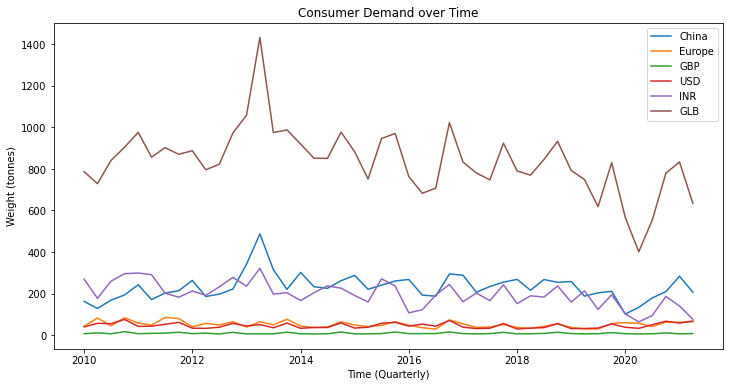

In [98]:
curs = ['GBP', 'USD', 'INR', 'GLB']

fig,ax = plt.subplots(figsize = (12,6))

#consumer2[consumer2['Currency'] == 'GLB'].plot(y = 'Demand', x = 'Term', kind = 'line', label = 'Global', ax=ax)

demand_cur[demand_cur['Currency'] == 'CNY'].plot(y = 'Demand', x = 'Term', kind = 'line', ax=ax, label = 'China')
demand_cur[demand_cur['Currency'] == 'EUR'].plot(y = 'Demand', x = 'Term', kind = 'line', ax=ax, label = 'Europe')

for i in curs:
    demand_cur[demand_cur['Currency'] == i].plot(y = 'Demand', x = 'Term', kind = 'line', ax = ax, label = i)

plt.title('Consumer Demand over Time')
plt.ylabel('Weight (tonnes)')
plt.xlabel('Time (Quarterly)')
plt.show()

## IMPORT PYTHON TO SQL WORKBENCH

In [99]:
## IMPORT PYTHON TO SQL WORKBENCH
import pymysql

In [100]:
conn = pymysql.connect(database= 'gold_stats', user='root', password='hachi815')
cursor = conn.cursor()

In [105]:
insert_query = 'INSERT INTO Consumers VALUES '
for i in range(consumer2.shape[0]):
    insert_query += "('"
    insert_query += str(consumer2.iloc[i,0])
    insert_query += "', '"
    insert_query += str(consumer2.iloc[i,1])
    insert_query += "', '"
    insert_query += str(consumer2.iloc[i,2])
    insert_query += "', "
    insert_query += str(consumer2.iloc[i,3])
    insert_query += '), '
    
        
insert_query = insert_query[:-2] + ';'
insert_query = insert_query.replace('nan', 'NULL')
insert_query[:1000]

"INSERT INTO Consumers VALUES ('2010-01-01', 'India', 'INR', 269.42), ('2010-04-01', 'India', 'INR', 177.12), ('2010-07-01', 'India', 'INR', 259.42), ('2010-10-01', 'India', 'INR', 295.75), ('2011-01-01', 'India', 'INR', 298.82), ('2011-04-01', 'India', 'INR', 290.84), ('2011-07-01', 'India', 'INR', 201.91), ('2011-10-01', 'India', 'INR', 182.45), ('2012-01-01', 'India', 'INR', 212.49), ('2012-04-01', 'India', 'INR', 191.48), ('2012-07-01', 'India', 'INR', 232.04), ('2012-10-01', 'India', 'INR', 278.15), ('2013-01-01', 'India', 'INR', 235.29), ('2013-04-01', 'India', 'INR', 321.67), ('2013-07-01', 'India', 'INR', 197.64), ('2013-10-01', 'India', 'INR', 203.98), ('2014-01-01', 'India', 'INR', 166.38), ('2014-04-01', 'India', 'INR', 203.92), ('2014-07-01', 'India', 'INR', 237.06), ('2014-10-01', 'India', 'INR', 226.1), ('2015-01-01', 'India', 'INR', 190.75), ('2015-04-01', 'India', 'INR', 159.16), ('2015-07-01', 'India', 'INR', 271.18), ('2015-10-01', 'India', 'INR', 236.15), ('2016-01-0

In [106]:
cursor.execute(insert_query)
conn.commit()